In [116]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [117]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
# test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

combine = [train_df, test_df]

In [118]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [119]:
for dataset in combine:
    # Replace each 'Rare' title with an educated guess
    dataset['Title'] = dataset['Title'].replace('Lady', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Countess', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Capt', 'Mr')
    dataset['Title'] = dataset['Title'].replace('Col', 'Mr')
    dataset['Title'] = dataset['Title'].replace('Don', 'Mr')
    dataset['Title'] = dataset['Title'].replace('Dr', 'Mr')  # or 'Mrs' if gender is known
    dataset['Title'] = dataset['Title'].replace('Major', 'Mr')
    dataset['Title'] = dataset['Title'].replace('Rev', 'Mr')
    dataset['Title'] = dataset['Title'].replace('Sir', 'Mr')
    dataset['Title'] = dataset['Title'].replace('Jonkheer', 'Mr')
    dataset['Title'] = dataset['Title'].replace('Dona', 'Mrs')

    # Replace 'Mlle', 'Ms', 'Mme' with 'Miss' and 'Mrs' respectively
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

# Calculate the mean survival rate by title
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.161710
3,Mrs,0.796875


In [120]:
for dataset in combine:
    # Initialize the columns to 0
    dataset['Title_Master'] = 0
    dataset['Title_Miss'] = 0
    dataset['Title_Mr'] = 0
    dataset['Title_Mrs'] = 0

    # Set the value to 1 where the condition is true
    dataset.loc[dataset['Title'] == 'Master', 'Title_Master'] = 1
    dataset.loc[dataset['Title'] == 'Miss', 'Title_Miss'] = 1
    dataset.loc[dataset['Title'] == 'Mr', 'Title_Mr'] = 1
    dataset.loc[dataset['Title'] == 'Mrs', 'Title_Mrs'] = 1
train_df.drop('Title', axis=1, inplace=True)
test_df.drop('Title', axis=1, inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,0,1,0


In [121]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 13), (418, 13))

In [122]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0,3,0,22.0,1,0,7.2500,NaN,S,0,0,1,0
1,1,1,1,38.0,1,0,71.2833,C85,C,0,0,0,1
2,1,3,1,26.0,0,0,7.9250,NaN,S,0,1,0,0
3,1,1,1,35.0,1,0,53.1000,C123,S,0,0,0,1
4,0,3,0,35.0,0,0,8.0500,NaN,S,0,0,1,0


In [123]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [124]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0,3,0,22,1,0,7.2500,NaN,S,0,0,1,0
1,1,1,1,38,1,0,71.2833,C85,C,0,0,0,1
2,1,3,1,26,0,0,7.9250,NaN,S,0,1,0,0
3,1,1,1,35,1,0,53.1000,C123,S,0,0,0,1
4,0,3,0,35,0,0,8.0500,NaN,S,0,0,1,0


In [125]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

C:\Users\dublu\AppData\Local\Temp\ipykernel_10124\987560108.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [126]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,AgeBand
0,0,3,0,1,1,0,7.2500,NaN,S,0,0,1,0,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C85,C,0,0,0,1,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,NaN,S,0,1,0,0,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,C123,S,0,0,0,1,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,NaN,S,0,0,1,0,"(32.0, 48.0]"


In [127]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0,3,0,1,1,0,7.2500,NaN,S,0,0,1,0
1,1,1,1,2,1,0,71.2833,C85,C,0,0,0,1
2,1,3,1,1,0,0,7.9250,NaN,S,0,1,0,0
3,1,1,1,2,1,0,53.1000,C123,S,0,0,0,1
4,0,3,0,2,0,0,8.0500,NaN,S,0,0,1,0


In [128]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [129]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [130]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,IsAlone
0,0,3,0,1,7.2500,NaN,S,0,0,1,0,0
1,1,1,1,2,71.2833,C85,C,0,0,0,1,0
2,1,3,1,1,7.9250,NaN,S,0,1,0,0,1
3,1,1,1,2,53.1000,C123,S,0,0,0,1,0
4,0,3,0,2,8.0500,NaN,S,0,0,1,0,1


In [131]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [132]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [133]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [134]:
for dataset in combine:
    # Initialize the columns to 0
    dataset['Embarked_S'] = 0
    dataset['Embarked_C'] = 0
    dataset['Embarked_Q'] = 0

    # Set the value to 1 where the condition is true
    dataset.loc[dataset['Embarked'] == 'S', 'Embarked_S'] = 1
    dataset.loc[dataset['Embarked'] == 'C', 'Embarked_C'] = 1
    dataset.loc[dataset['Embarked'] == 'Q', 'Embarked_Q'] = 1
train_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,IsAlone,Age*Class,Embarked_S,Embarked_C,Embarked_Q
0,0,3,0,1,7.2500,NaN,0,0,1,0,0,3,1,0,0
1,1,1,1,2,71.2833,C85,0,0,0,1,0,2,0,1,0
2,1,3,1,1,7.9250,NaN,0,1,0,0,1,3,1,0,0
3,1,1,1,2,53.1000,C123,0,0,0,1,0,2,1,0,0
4,0,3,0,2,8.0500,NaN,0,0,1,0,1,6,1,0,0


In [135]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,IsAlone,Age*Class,Embarked_S,Embarked_C,Embarked_Q
0,892,3,0,2,7.8292,NaN,0,0,1,0,1,6,0,0,1
1,893,3,1,2,7.0000,NaN,0,0,0,1,0,6,1,0,0
2,894,2,0,3,9.6875,NaN,0,0,1,0,1,6,0,0,1
3,895,3,0,1,8.6625,NaN,0,0,1,0,1,3,1,0,0
4,896,3,1,1,12.2875,NaN,0,0,0,1,0,3,1,0,0


In [136]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

C:\Users\dublu\AppData\Local\Temp\ipykernel_10124\2916669673.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convert the Fare feature to ordinal values based on the FareBand.

In [137]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)

combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,IsAlone,Age*Class,Embarked_S,Embarked_C,Embarked_Q
0,0,3,0,1,0,NaN,0,0,1,0,0,3,1,0,0
1,1,1,1,2,3,C85,0,0,0,1,0,2,0,1,0
2,1,3,1,1,1,NaN,0,1,0,0,1,3,1,0,0
3,1,1,1,2,3,C123,0,0,0,1,0,2,1,0,0
4,0,3,0,2,1,NaN,0,0,1,0,1,6,1,0,0
5,0,3,0,1,1,NaN,0,0,1,0,1,3,0,0,1
6,0,1,0,3,3,E46,0,0,1,0,1,3,1,0,0
7,0,3,0,0,2,NaN,1,0,0,0,0,0,1,0,0
8,1,3,1,1,1,NaN,0,0,0,1,0,3,1,0,0
9,1,2,1,0,2,NaN,0,0,0,1,0,0,0,1,0


And the test dataset.

In [138]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,IsAlone,Age*Class,Embarked_S,Embarked_C,Embarked_Q
0,892,3,0,2,0,NaN,0,0,1,0,1,6,0,0,1
1,893,3,1,2,0,NaN,0,0,0,1,0,6,1,0,0
2,894,2,0,3,1,NaN,0,0,1,0,1,6,0,0,1
3,895,3,0,1,1,NaN,0,0,1,0,1,3,1,0,0
4,896,3,1,1,1,NaN,0,0,0,1,0,3,1,0,0
5,897,3,0,0,1,NaN,0,0,1,0,1,0,1,0,0
6,898,3,1,1,0,NaN,0,1,0,0,1,3,0,0,1
7,899,2,0,1,2,NaN,0,0,1,0,0,2,1,0,0
8,900,3,1,1,0,NaN,0,0,0,1,1,3,0,1,0
9,901,3,0,1,2,NaN,0,0,1,0,0,3,1,0,0


In [139]:
# Calculate median fare for each class
median_fares = train_df.groupby('Pclass')['Fare'].median().tolist()

# Function to guess deck based on fare and class
def guess_deck(row):
    if pd.isnull(row['Cabin']):
        if row['Pclass'] == 1:
            return 'A' if row['Fare'] >= median_fares[0] else 'B'
        elif row['Pclass'] == 2:
            return 'D' if row['Fare'] >= median_fares[1] else 'E'
        else:
            return 'F' if row['Fare'] >= median_fares[2] else 'G'
    else:
        return row['Cabin'][0]

# Apply the function to guess missing deck values
for dataset in combine:
    dataset['Deck'] = dataset.apply(guess_deck, axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,IsAlone,Age*Class,Embarked_S,Embarked_C,Embarked_Q,Deck
0,0,3,0,1,0,NaN,0,0,1,0,0,3,1,0,0,G
1,1,1,1,2,3,C85,0,0,0,1,0,2,0,1,0,C
2,1,3,1,1,1,NaN,0,1,0,0,1,3,1,0,0,F
3,1,1,1,2,3,C123,0,0,0,1,0,2,1,0,0,C
4,0,3,0,2,1,NaN,0,0,1,0,1,6,1,0,0,F


In [140]:
for dataset in combine:


    # Map the decks to the three groups
    deck_mapping = {
        'A': 'Upper',
        'B': 'Upper',
        'C': 'Middle',
        'D': 'Middle',
        'E': 'Middle',
        'F': 'Lower',
        'G': 'Lower',
        'T': 'Upper'  # 'T' is a unique case and might be treated differently depending on your analysis
    }

    dataset['Deck_Group'] = dataset['Deck'].map(deck_mapping)
train_df.drop(['Cabin', 'Deck'], axis=1, inplace=True)
test_df.drop(['Cabin', 'Deck'], axis=1, inplace=True)
train_df.head()
for dataset in combine:
    # Initialize the columns to 0
    dataset['Deck_Group_Upper'] = 0
    dataset['Deck_Group_Middle'] = 0
    dataset['Deck_Group_Lower'] = 0

    dataset.loc[dataset['Deck_Group'] == 'Upper', 'Deck_Group_Upper'] = 1
    dataset.loc[dataset['Deck_Group'] == 'Middle', 'Deck_Group_Middle'] = 1
    dataset.loc[dataset['Deck_Group'] == 'Lower', 'Deck_Group_Lower'] = 1
train_df.drop(['Deck_Group'], axis=1, inplace=True)
test_df.drop(['Deck_Group'], axis=1, inplace=True)    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,IsAlone,Age*Class,Embarked_S,Embarked_C,Embarked_Q,Deck_Group_Upper,Deck_Group_Middle,Deck_Group_Lower
0,0,3,0,1,0,0,0,1,0,0,3,1,0,0,0,0,1
1,1,1,1,2,3,0,0,0,1,0,2,0,1,0,0,1,0
2,1,3,1,1,1,0,1,0,0,1,3,1,0,0,0,0,1
3,1,1,1,2,3,0,0,0,1,0,2,1,0,0,0,1,0
4,0,3,0,2,1,0,0,1,0,1,6,1,0,0,0,0,1


In [141]:
# deck_mapping = {"U": 9,"T": 8,"G": 7,"F": 6,"E": 5,"D": 4,"C": 3,"B": 2,"A": 1 } # U  for unknown Deck 


# # Adding Cabin Deck as a feature
# for dataset in combine:
#     dataset['Deck'] = dataset.Cabin.str.extract('([A-Za-z]+)', expand=False)
#     dataset['Deck'] = dataset['Deck'].map(deck_mapping) # Map the Deck names to numerical values
#     dataset['Deck'] = dataset['Deck'].fillna(0)

# # Recursive Feature Elimination for Feature selection 
# dataset['Deck']=dataset['Deck'].astype(int)

# train_df=train_df.drop(['Cabin'],axis=1)
# test_df=test_df.drop(['Cabin'],axis=1)
# train_df['Deck']=train_df['Deck'].astype(int)
# test_df['Deck']=test_df['Deck'].astype(int)
# combine=[train_df,test_df]

In [142]:
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,IsAlone,Age*Class,Embarked_S,Embarked_C,Embarked_Q,Deck_Group_Upper,Deck_Group_Middle,Deck_Group_Lower
0,0,3,0,1,0,0,0,1,0,0,3,1,0,0,0,0,1
1,1,1,1,2,3,0,0,0,1,0,2,0,1,0,0,1,0
2,1,3,1,1,1,0,1,0,0,1,3,1,0,0,0,0,1
3,1,1,1,2,3,0,0,0,1,0,2,1,0,0,0,1,0
4,0,3,0,2,1,0,0,1,0,1,6,1,0,0,0,0,1
5,0,3,0,1,1,0,0,1,0,1,3,0,0,1,0,0,1
6,0,1,0,3,3,0,0,1,0,1,3,1,0,0,0,1,0
7,0,3,0,0,2,1,0,0,0,0,0,1,0,0,0,0,1
8,1,3,1,1,1,0,0,0,1,0,3,1,0,0,0,0,1
9,1,2,1,0,2,0,0,0,1,0,0,0,1,0,0,1,0


In [143]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 16), (891,), (418, 16))

[Text(0.5, 0.875, 'Title_Mr <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]\nclass = Survived'),
 Text(0.25, 0.625, 'Pclass <= 2.5\nentropy = 0.852\nsamples = 353\nvalue = [98, 255]\nclass = Not Survived'),
 Text(0.125, 0.375, 'Deck_Group_Middle <= 0.5\nentropy = 0.285\nsamples = 181\nvalue = [9, 172]\nclass = Not Survived'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 50\nvalue = [0, 50]\nclass = Not Survived'),
 Text(0.1875, 0.125, 'entropy = 0.361\nsamples = 131\nvalue = [9, 122]\nclass = Not Survived'),
 Text(0.375, 0.375, 'Fare <= 2.5\nentropy = 0.999\nsamples = 172\nvalue = [89, 83]\nclass = Survived'),
 Text(0.3125, 0.125, 'entropy = 0.993\nsamples = 146\nvalue = [66, 80]\nclass = Not Survived'),
 Text(0.4375, 0.125, 'entropy = 0.516\nsamples = 26\nvalue = [23, 3]\nclass = Survived'),
 Text(0.75, 0.625, 'Pclass <= 1.5\nentropy = 0.638\nsamples = 538\nvalue = [451, 87]\nclass = Survived'),
 Text(0.625, 0.375, 'Fare <= 1.0\nentropy = 0.941\nsamples = 120\nvalue = [77

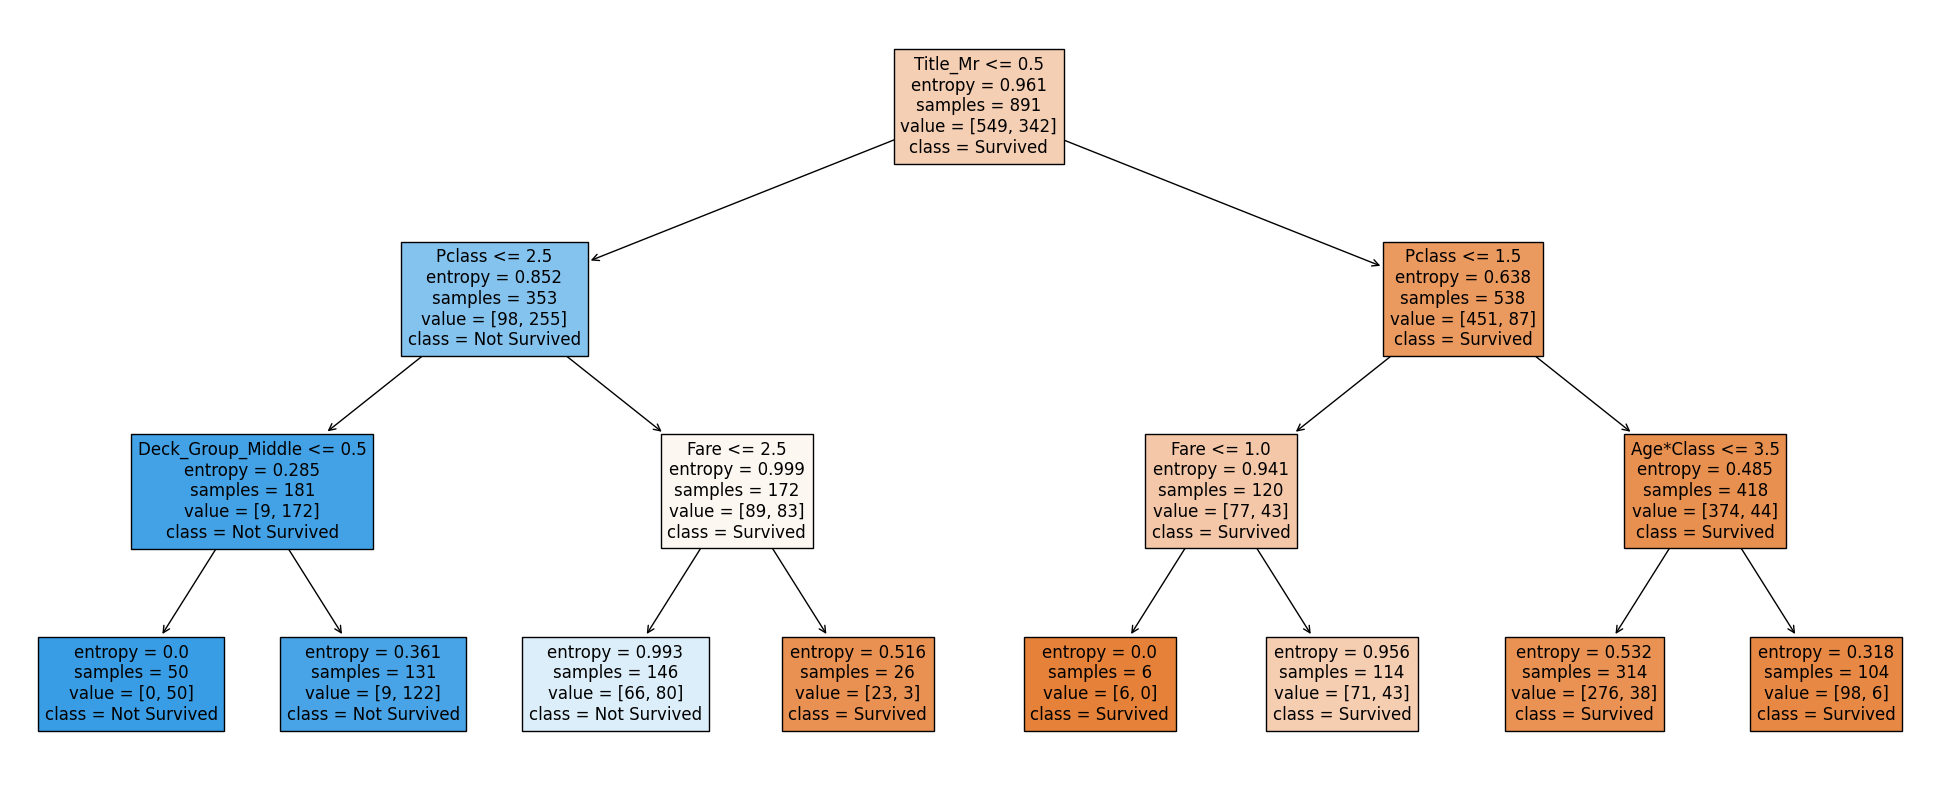

In [148]:
'''Learn and fine-tune a decision tree model with the Titanic training data, plot
your decision tree;'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree

# Create Decision Tree classifer object
# change depth for better visualization
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Plot the decision tree using sklearn.tree.plot_tree
plt.figure(figsize=(25,10))
tree.plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['Survived', 'Not Survived'])


In [145]:
# increased folds to 5
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
scores = cross_val_score(clf, X_train, Y_train, cv=5)
# print each fold's score
for i in range(len(scores)):
    print("Fold", i+1, ":", scores[i])
# print average score
print("Average score:", scores.mean())




Fold 1 : 0.8324022346368715
Fold 2 : 0.8033707865168539
Fold 3 : 0.8089887640449438
Fold 4 : 0.7921348314606742
Fold 5 : 0.8370786516853933
Average score: 0.8147950536689474


In [146]:
# Random Forest with 5 folds
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=50)
scores = cross_val_score(clf, X_train, Y_train, cv=5)
# print each fold's score
for i in range(len(scores)):
    print("Fold", i+1, ":", scores[i])
# print average score
print("Average score:", scores.mean())



Fold 1 : 0.7932960893854749
Fold 2 : 0.8314606741573034
Fold 3 : 0.8202247191011236
Fold 4 : 0.7808988764044944
Fold 5 : 0.8651685393258427
Average score: 0.8182097796748478
